<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

California has enacted policies in reponse to judicial rulings and legislative mandates over the last few decades in response to inequalites in school funding based on property tax revenue; mandating equal funding for all schools should minimize academic achievement discrepancies, so median home values for the zip code in which a school is should not track educational perfomance. 

Have the enacted policies served to close benchmarks gaps previously attributed to discrepancies due to property-value/tax - based funding?

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

1971's John Serrano et. al vs. State Treasurer Ivy Park Priest California Supreme Stat Court ruling mandated that funding for public schools be administered at a state level, ensureing that local property-tax-based funding didn't propagate violations of state and federal constitutional law. 1977's Serrano II ruled that the state had failed to address the issues of inequality in funding, and mandated a maximum discrepancy of 100 dollars per pupil.

Do schools within communites with higher-valued properties have higher academic benchmarks?

Mapping median home list values for the zip in which a school is reporting results serves as an initial analyses. Median list value is a proxy for true home value, though homes often sell and are assessed higher than list; sale inventory lists are often proprietary, and local tax information is based on assement methods that track value at time of purchase rather than local. 

This analyses excusively looks at trends in 2019 for 12th graders - not an analyses over time, nor of a specific cohort, nor as a function of property value deltas. 

### Data

* [`act_2019_ca.csv`](./data/act_2019_ca.csv): 2019 ACT Scores in California by School
* [`sat_2019_ca.csv`](./data/sat_2019_ca.csv): 2019 SAT Scores in California by School
* [`pubschls.xlsx`](./data/pubschls.xlsx): School Codes and Addresses
* [`realtor.csv`](./data/realtor.csv): Median Listing Price for all ZIP codes in USA from realtor.com

**To-Do:** *Fill out this cell with outside research or any additional background information that will support your analysis.*

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
# Takes series - a single column - and calculates mean. 

def my_mean(l): 
    data = [x for x in data if str(x) != 'nan']
    return sum(data)/len(data)

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [2]:
def calculate_stddev(series):
    mean = my_mean(series)
    sq_list = [(x - mean)**2 for x in data]
    sum_squares_n = sum(sq_list) / len(series)
    return sum_squares_n ** 0.5

3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [3]:
def num_cleaner(str_value):
    new_str = str_value.replace("%", "")
    return (float(new_str))/100

In [4]:
num_cleaner('50.2%')

0.502

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [5]:
# Imports:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

## Data Import and Cleaning

- imported home-value data directly from Realtor.com with realtor.py, saved as realtory.csv
- imported all data as string to mantain leading 0s for zip and school codes, ensuring they were mapped properly, 
- converted relevant series to float later
- created new dataframes from relevant series to reduce redundant operations and expedite computing time

In [6]:
# importing data: 

In [7]:
# importing all data as str to presever leading 0s needed for zip code and school code mapping
realtor = pd.read_csv('../data/realtor.csv', dtype=str) # median home listing price by zip code from realtor.com

In [8]:
act2019 = pd.read_csv('../data/act_2019_ca.csv', dtype=str) # Provided ACT 2019 scores for 2310 CA schools 

In [9]:
sat2019 = pd.read_csv('../data/sat_2019_ca.csv', dtype=str) # Provided SAT 2019 scores for 2580 CA schools 

In [10]:
# imports file header statements as separate cells, so skip first 4 rows on import
school_codes = pd.read_excel('../data/pubschls.xlsx',  dtype=str, skiprows = 5) # (or) dtype=object
# school_codes = pd.read_excel('../data/pubschls.xlsx') 

In [11]:
# understanging structure and content of df
realtor.head()

,Unnamed: 0,month_date_yyyymm,postal_code,median_listing_price,median_listing_price_mm,median_listing_price_yy,average_listing_price,average_listing_price_yy
0,0,202201,35475,340000.0,-0.0283,-0.0529,398224.0,-0.2802
1,1,202201,38044,1500000.0,0.0,0.0,1500000.0,0.0
2,2,202201,78501,215000.0,-0.0227,-0.0652,238277.0,-0.093
3,3,202201,84718,469000.0,0.0,-0.0209,469000.0,-0.0209
4,4,202201,93622,325000.0,-0.1558,-0.1168,304667.0,-0.0875


In [12]:
# many empty modules, but since I will be extracting based on contents of a 
# different df., will not drop any values from this df
# (1811597, 8) listings over all US zips, will map to < 10000 school-cdscode-zip series 
realtor.isnull().sum()

Unnamed: 0                       0
month_date_yyyymm                0
postal_code                      0
median_listing_price          3716
median_listing_price_mm     273538
median_listing_price_yy     323622
average_listing_price         3716
average_listing_price_yy    323622
dtype: int64

In [35]:
realtor.shape

(1811597, 8)

In [96]:
# zip code will remain str
# listings price will convert to float
realtor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1811597 entries, 0 to 1811596
Data columns (total 8 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   Unnamed: 0                object
 1   date                      object
 2   zip                       object
 3   med_list_price            object
 4   median_listing_price_mm   object
 5   median_listing_price_yy   object
 6   avg_list_price            object
 7   average_listing_price_yy  object
dtypes: object(8)
memory usage: 110.6+ MB


In [97]:
act2019.head()

,cds,ccode,cdcode,scode,rtype,sname,dname,cname,enroll12,numtsttakr,avgscrread,avgscreng,avgscrmath,avgscrsci,numge21,p_pass,year,unnamed: 17
0,33669930129882,33,3366993,0129882,S,21st Century Learning Institute,Beaumont Unified,Riverside,18,0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1,19642121995596,19,1964212,1995596,S,ABC Secondary (Alternative),ABC Unified,Los Angeles,58,0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
2,15637761530377,15,1563776,1530377,S,Abraham Lincoln Alternative,Southern Kern Unified,Kern,18,0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
3,43696664333795,43,4369666,4333795,S,Abraham Lincoln High,San Jose Unified,Santa Clara,463,53,23,22,22,23,34,64.15,2018-19,NaN
4,19647331935121,19,1964733,1935121,S,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226,19,21,20,23,22,11,57.89,2018-19,NaN


In [98]:
# 357 cells do not have PPCTGE21, my series of interest. Will drop after slicing series
# (2310, 18), will be < 2000 after dropping null cells
act2019.isnull().sum()

cds               1
ccode             1
cdcode            1
scode           523
rtype             1
sname           581
dname            59
cname             1
enroll12          1
numtsttakr        1
avgscrread      357
avgscreng       357
avgscrmath      357
avgscrsci       357
numge21         357
p_pass          357
year              1
unnamed: 17    2310
dtype: int64

In [99]:
act2019.shape

(2310, 18)

In [100]:
# will keep school codes as str
# convert pctge21 to int later
act2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   cds          2309 non-null   object
 1   ccode        2309 non-null   object
 2   cdcode       2309 non-null   object
 3   scode        1787 non-null   object
 4   rtype        2309 non-null   object
 5   sname        1729 non-null   object
 6   dname        2251 non-null   object
 7   cname        2309 non-null   object
 8   enroll12     2309 non-null   object
 9   numtsttakr   2309 non-null   object
 10  avgscrread   1953 non-null   object
 11  avgscreng    1953 non-null   object
 12  avgscrmath   1953 non-null   object
 13  avgscrsci    1953 non-null   object
 14  numge21      1953 non-null   object
 15  p_pass       1953 non-null   object
 16  year         2309 non-null   object
 17  unnamed: 17  0 non-null      object
dtypes: object(18)
memory usage: 325.0+ KB


In [101]:
sat2019.head()

,cds,ccode,cdcode,scode,rtype,sname,dname,cname,enroll12,numtsttakr12,...,numerwbenchmark11,pcterwbenchmark11,nummathbenchmark11,pctmathbenchmark11,totnumbothbenchmark12,p_pass,totnumbothbenchmark11,pctbothbenchmark11,year,unnamed: 25
0,06615980630046,06,0661598,0630046,S,Colusa Alternative Home,Colusa Unified,Colusa,18,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1,06616060634758,06,0661606,0634758,S,Maxwell Sr High,Maxwell Unified,Colusa,29,10,...,*,*,*,*,*,*,*,*,2018-19,NaN
2,19647331930924,19,1964733,1930924,S,Belmont Senior High,Los Angeles Unified,Los Angeles,206,102,...,42,24.14,12,6.90,14,13.73,11,6.32,2018-19,NaN
3,19647331931476,19,1964733,1931476,S,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227,113,...,97,35.27,37,13.45,18,15.93,35,12.73,2018-19,NaN
4,19647331931856,19,1964733,1931856,S,Whitman Continuation,Los Angeles Unified,Los Angeles,18,14,...,*,*,*,*,*,*,*,*,2018-19,NaN


In [102]:
sat2019.shape

(2580, 26)

In [103]:
# 311 cells do not have PctBothBenchmark11, my series of interest; will drop after slicing series
# (2580, 26), will be < 2200 after dropping null cells
sat2019.isnull().sum()

cds                         1
ccode                       1
cdcode                      1
scode                       1
rtype                       1
sname                     598
dname                      59
cname                       1
enroll12                    1
numtsttakr12                1
numerwbenchmark12         276
pcterwbenchmark12         276
nummathbenchmark12        276
pctmathbenchmark12        276
enroll11                    1
numtsttakr11                1
numerwbenchmark11         311
pcterwbenchmark11         311
nummathbenchmark11        311
pctmathbenchmark11        311
totnumbothbenchmark12     276
p_pass                    276
totnumbothbenchmark11     311
pctbothbenchmark11        311
year                        1
unnamed: 25              2580
dtype: int64

In [104]:
# will keep school codes as str
# convert pctge21 to int later
sat2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   cds                    2579 non-null   object
 1   ccode                  2579 non-null   object
 2   cdcode                 2579 non-null   object
 3   scode                  2579 non-null   object
 4   rtype                  2579 non-null   object
 5   sname                  1982 non-null   object
 6   dname                  2521 non-null   object
 7   cname                  2579 non-null   object
 8   enroll12               2579 non-null   object
 9   numtsttakr12           2579 non-null   object
 10  numerwbenchmark12      2304 non-null   object
 11  pcterwbenchmark12      2304 non-null   object
 12  nummathbenchmark12     2304 non-null   object
 13  pctmathbenchmark12     2304 non-null   object
 14  enroll11               2579 non-null   object
 15  numtsttakr11         

In [105]:
# (18234, 47) I only need two series, cds_code mapped to zip
# from school_codes, will extract at most (len(sat2019) + len(act2019) ) 'rows'
school_codes.shape

(18231, 2)

In [106]:
school_codes.head(10)

,cds,zip
0,01100170000000,94544
1,01100170109835,94560
2,01100170112607,94612
3,01100170118489,94703
4,01100170123968,94606
5,01100170124172,94608
6,01100170125567,94619
7,01100170129403,94601
8,01100170130302,94541
9,01100170130401,94578


In [107]:
# shows no null becuase "nan" string is used to mark null elements
# will drop after series extraction
school_codes.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18231 entries, 0 to 18230
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cds     18231 non-null  object
 1   zip     18231 non-null  object
dtypes: object(2)
memory usage: 285.0+ KB


In [108]:
# changing all column names to lower_case for sat
# renaming series of interest to faciliate:
# cleaning and slicing subsequently
sat2019.columns = sat2019.columns.str.lower()
sat_new_col = {'pctbothbenchmark12': 'p_pass'}
sat2019.rename(columns = sat_new_col, inplace=True)

In [109]:
# PCT Both BenchMark12 : only looking at composite becuase 
# data does not include breakdown by each component 
# Currently, not interested in Grade 11 attainment.

sat = sat2019.loc[ :,('cds', 'p_pass')]
# cleaning: drop null, drop '*' characters
# 2580, 26 -> 1722
sat = sat.dropna() # drop 276
sat = sat[sat.p_pass != '*'] # drop 582 
# sat = sat[sat.p_pass != '0.00']
# convert benchmark rate to float 
sat['p_pass'] = sat['p_pass'].astype(float)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1722 entries, 2 to 2578
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cds     1722 non-null   object 
 1   p_pass  1722 non-null   float64
dtypes: float64(1), object(1)
memory usage: 40.4+ KB


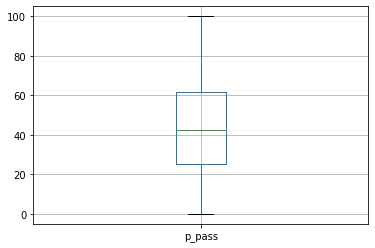

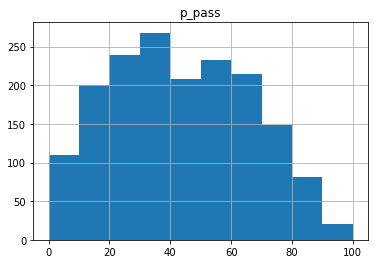

In [110]:
sat.info()
sat.describe()
boxplot = sat.boxplot()
hist = sat.hist()

In [111]:
# SAT distribution looks really close to normal overall 

In [112]:
# changing all column names to lower_case for act
# renaming series of interest to faciliate:
# cleaning and slicing subsequently

act2019.columns = act2019.columns.str.lower()
act_new_col = {'pctge21': 'p_pass'}
act2019.rename(columns = act_new_col, inplace=True)
# extract series of interest
act = act2019.loc[:,('cds','p_pass')]

In [113]:
# cleaning data from original (2309, 2) -> 1421 
# will loose: 
# 358 score cells to '*' string

act = act.dropna() # drops 356
act = act[act.p_pass != '*'] 
#act = act[act.p_pass != '0.00']
# Converting string to float for score
act['p_pass'] = act['p_pass'].astype(float)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1421 entries, 3 to 2306
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cds     1421 non-null   object 
 1   p_pass  1421 non-null   float64
dtypes: float64(1), object(1)
memory usage: 33.3+ KB


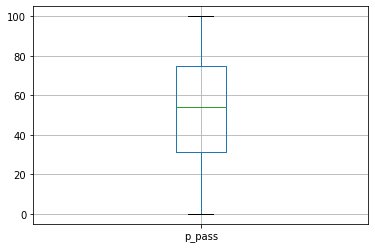

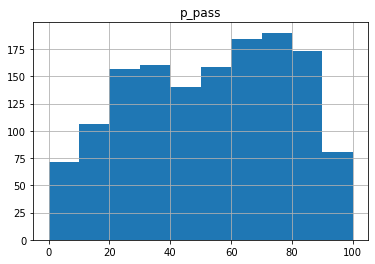

In [114]:
act.info()
act.describe()
boxplot = act.boxplot()
hist = act.hist()

In [115]:
# ACT benchmark-passing appears higher than SAT 

In [116]:
#all names lowercase alread; renaming column of interest
real = realtor
real_new_col = { 
    'month_date_yyyymm': 'date', 
    'postal_code': 'zip', 
    'median_listing_price': 'med_list_price', 
    'average_listing_price': 'avg_list_price'}
real.rename(columns = real_new_col, inplace=True)
# extract series of interest
real = real.loc[:,('date', 'zip', 'med_list_price', 'avg_list_price' )]
# Converting list prices string to float
real['med_list_price'] = real['med_list_price'].astype(float)
real['avg_list_price'] = real['avg_list_price'].astype(float)

In [117]:
real.info()
real.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1811597 entries, 0 to 1811596
Data columns (total 4 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   zip             object 
 2   med_list_price  float64
 3   avg_list_price  float64
dtypes: float64(2), object(2)
memory usage: 55.3+ MB


,med_list_price,avg_list_price
count,1.807881e+06,1.807881e+06
mean,3.492388e+05,4.090404e+05
std,9.396937e+05,9.498614e+05
min,1.000000e+00,1.000000e+00
25%,1.470000e+05,1.638000e+05
50%,2.440000e+05,2.715560e+05
75%,3.899000e+05,4.471070e+05
max,2.790000e+08,2.790000e+08


In [118]:
# average list price data is wildl, all over the place. Will only use median and subsets thereof 

In [119]:
# changing all column names to lower_case for school codes
school_codes.columns = school_codes.columns.str.lower()
# renaming series of interest to faciliate:
sch_new_col = {'cdscode': 'cds'}
school_codes.rename(columns = sch_new_col, inplace=True)
# extract series of interest
school_codes = school_codes.loc[:,('cds', 'zip' )]
# zip and cds will remain string to maintain leading zeros
school_codes = school_codes[:-1]  # eliminiate footer, sum-check row
school_codes['zip'] = school_codes['zip'].str.slice(0,5) #to zip 5

In [120]:
school_codes.info()
school_codes.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18230 entries, 0 to 18229
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cds     18230 non-null  object
 1   zip     18230 non-null  object
dtypes: object(2)
memory usage: 285.0+ KB


,cds,zip
count,18230,18230
unique,18230,1679
top,01100170000000,No Da
freq,1,292


In [121]:
### Now we are merging ! Thank you @ Jake Ellena for this life-saver function. 

In [122]:
# with help from Jake !!!
sat = sat.merge(school_codes,left_on='cds', right_on='cds') # merge sat with codes 

In [123]:
sat.info()
sat.head()
sat.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1659 entries, 0 to 1658
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cds     1659 non-null   object 
 1   p_pass  1659 non-null   float64
 2   zip     1659 non-null   object 
dtypes: float64(1), object(2)
memory usage: 51.8+ KB


,p_pass
count,1659.000000
mean,43.209994
std,23.088451
min,0.000000
25%,24.540000
50%,41.860000
75%,61.540000
max,100.000000


In [124]:
sat_real = sat.merge(real,left_on='zip', right_on='zip') # final merge sat with real estate zips

In [125]:
sat_real = sat_real.drop_duplicates(subset=['cds', 'zip'])
sat_real.info()
sat_real.head()
sat_real.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1651 entries, 0 to 109478
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cds             1651 non-null   object 
 1   p_pass          1651 non-null   float64
 2   zip             1651 non-null   object 
 3   date            1651 non-null   object 
 4   med_list_price  1646 non-null   float64
 5   avg_list_price  1646 non-null   float64
dtypes: float64(3), object(3)
memory usage: 90.3+ KB


,p_pass,med_list_price,avg_list_price
count,1651.000000,1.646000e+03,1.646000e+03
mean,43.178243,9.006559e+05,1.145565e+06
std,23.092077,9.054841e+05,1.935886e+06
min,0.000000,1.150000e+05,1.150000e+05
25%,24.405000,5.299000e+05,5.733760e+05
50%,41.790000,6.990000e+05,7.805500e+05
75%,61.565000,9.387500e+05,1.128804e+06
max,100.000000,1.999500e+07,4.408967e+07


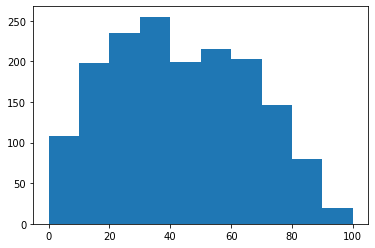

In [126]:
plt.hist(sat['p_pass']);
#plt.hist(sat['med_list_price'], bins = 200)

In [127]:
### ACT MERGE
act = act.merge(school_codes,left_on='cds', right_on='cds') # merge act with codes 

In [128]:
act_real = act.merge(real,left_on='zip', right_on='zip') # final merge act with real estate zips

In [129]:
act_real = act_real.drop_duplicates(subset=['cds', 'zip'])

In [130]:
act_real.describe()

,p_pass,med_list_price,avg_list_price
count,1357.000000,1.354000e+03,1.354000e+03
mean,52.433589,9.280139e+05,1.201987e+06
std,25.885395,9.513096e+05,2.099701e+06
min,0.000000,1.400000e+05,1.400000e+05
25%,30.770000,5.490000e+05,5.882150e+05
50%,54.160000,7.199940e+05,8.010555e+05
75%,75.000000,9.780000e+05,1.183029e+06
max,100.000000,1.999500e+07,4.408967e+07


KeyError: 'med_list_price'

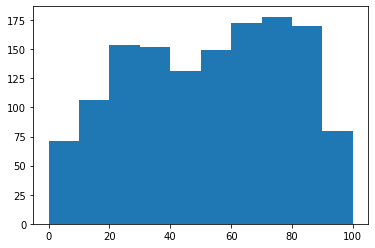

In [131]:
plt.hist(act['p_pass'])
plt.hist(act['med_list_price'], bins = 200)

In [132]:
# change analyses variable here: 
real_lim = 50_000_0000 # upper limit for median list values created subset without outliers

#act_sub = act_real
act_sub = act_real[act_real['med_list_price'] < real_lim]
#sat_sub = sat_real
sat_sub = sat_real[sat_real['med_list_price'] < real_lim]

In [133]:
act_sub.describe()

,p_pass,med_list_price,avg_list_price
count,1354.000000,1.354000e+03,1.354000e+03
mean,52.412482,9.280139e+05,1.201987e+06
std,25.909906,9.513096e+05,2.099701e+06
min,0.000000,1.400000e+05,1.400000e+05
25%,30.770000,5.490000e+05,5.882150e+05
50%,54.050000,7.199940e+05,8.010555e+05
75%,75.000000,9.780000e+05,1.183029e+06
max,100.000000,1.999500e+07,4.408967e+07


In [134]:
sat_sub.describe()

,p_pass,med_list_price,avg_list_price
count,1646.000000,1.646000e+03,1.646000e+03
mean,43.145304,9.006559e+05,1.145565e+06
std,23.115800,9.054841e+05,1.935886e+06
min,0.000000,1.150000e+05,1.150000e+05
25%,24.345000,5.299000e+05,5.733760e+05
50%,41.715000,6.990000e+05,7.805500e+05
75%,61.540000,9.387500e+05,1.128804e+06
max,100.000000,1.999500e+07,4.408967e+07


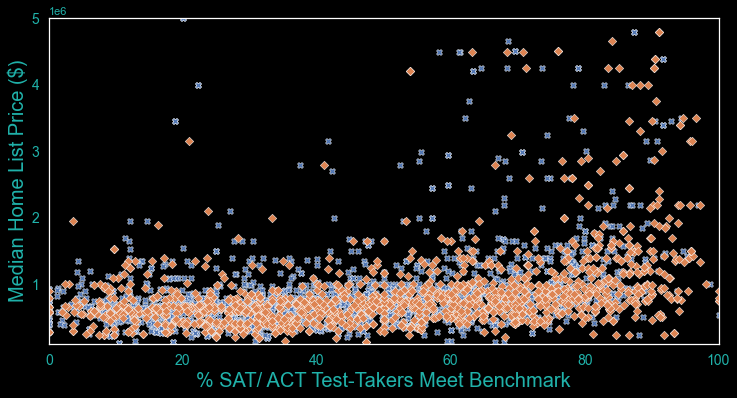

In [135]:
sns.set(rc={
    'figure.figsize':(12,6),
    'axes.facecolor':'black', 
    'figure.facecolor':'black',
    'axes.labelsize': 20,
})

fig, ax = plt.subplots()
ax.set_ylim(100000, 5_000_000)
ax.set_xlim(0,100)
ax.tick_params(axis='y', colors='lightseagreen', labelsize = '14')
ax.tick_params(axis='x', colors='lightseagreen', labelsize = '14')
ax.grid(False)
ax.set_xlabel('% SAT/ ACT Test-Takers Meet Benchmark', color='lightseagreen')
ax.set_ylabel('Median Home List Price ($)', color='lightseagreen')

sns.scatterplot(x = sat_sub['p_pass'] , y = sat_sub['med_list_price'], marker='X');
sns.scatterplot(x = act_sub['p_pass'] , y = act_sub['med_list_price'], marker = 'D');


plt.show()

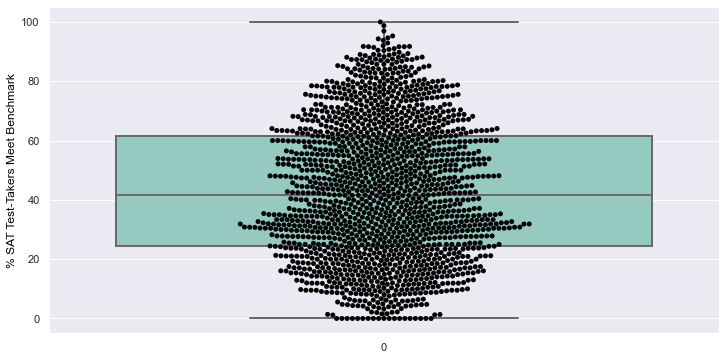

In [136]:
#Plotting swarm (distribution) over box plot. 

sns.set_theme(style="darkgrid")
xsat_box = sns.boxplot(data=(sat_sub['p_pass']), palette="Set3", linewidth=2)
ax = sns.swarmplot(data=(sat_sub['p_pass']), color=".01")
ax.set_ylabel('% SAT Test-Takers Meet Benchmark', color='black')

plt.show()

In [137]:
# SAT looks pretty normal here as well 

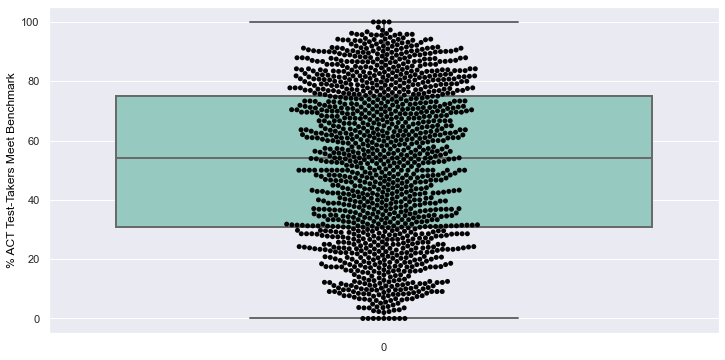

In [138]:
sns.set_theme(style="darkgrid")
xsat_box = sns.boxplot(data=(act_sub['p_pass']), palette="Set3", linewidth=2)
ax = sns.swarmplot(data=(act_sub['p_pass']), color=".01")
ax.set_ylabel('% ACT Test-Takers Meet Benchmark', color='black')

plt.show()

In [139]:
# ACT is MUCH higher skewed

In [140]:
# change analyses variable here: 
real_lim = 1_000_000 # limit for median list values created subset without outliers

#act_sub = act_real
act_sub = act_real[act_real['med_list_price'] > real_lim]
#sat_sub = sat_real
sat_sub = sat_real[sat_real['med_list_price'] > real_lim]

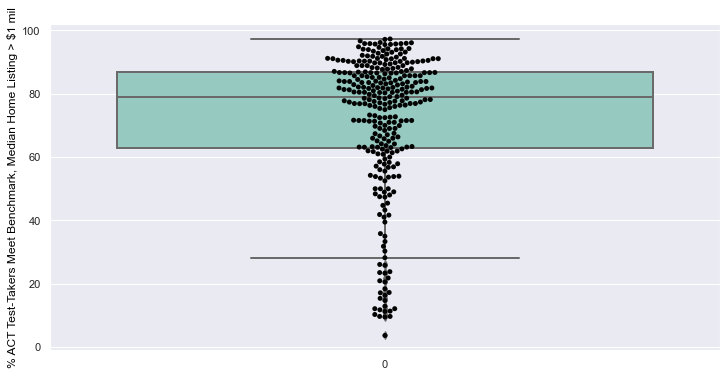

In [141]:
sns.set_theme(style="darkgrid")
xsat_box = sns.boxplot(data=(act_sub['p_pass']), palette="Set3", linewidth=2)
ax = sns.swarmplot(data=(act_sub['p_pass']), color=".01")
ax.set_ylabel('% ACT Test-Takers Meet Benchmark, Median Home Listing > $1 mil', color='black')

plt.show()

In [142]:
# ACT benchmark rates for schools in zip codes with med list price > $1 mil score A LOT better

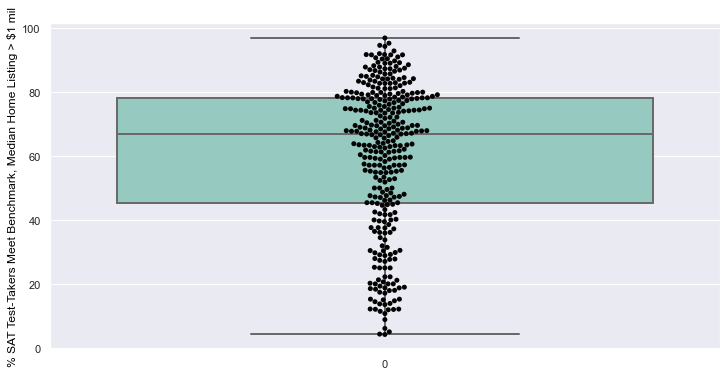

In [143]:
sns.set_theme(style="darkgrid")
xsat_box = sns.boxplot(data=(sat_sub['p_pass']), palette="Set3", linewidth=2)
ax = sns.swarmplot(data=(sat_sub['p_pass']), color=".01")
ax.set_ylabel('% SAT Test-Takers Meet Benchmark, Median Home Listing > $1 mil', color='black')

plt.show()

In [ ]:
# Same with SAT, but not as markedly

### Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|cds|object/ string|school codes | school code | 
|p_pass|float|ACT/SAT| % meet or exceeding benchmark |
|zip|object/string|realtor| zip code | 
|med_list_price|float|realtor| median home list price |
|avg_list_price|float|realtor| average home list price |

## Exploratory Data Analysis


An initial plotting shows a trend to higher rates of benchmark success for ACT and SAT in zip codes with higher median home list values, but more strongly so with ACT. 

## Conclusions and Recommendations

Property values still track standardized testing scores, but are scores a reliable metric? Furthermore, an analysis of the same question over time would illustrate a true trend, and what the effect of judicial- and legislative- mandated funding results have been over the decades since rulings specifically addressing propertly value vs. quality of education. 